# Singular vektor Dekomposition for Matrix Transformation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

titanik_df = sns.load_dataset('titanic')
titanik_df.head()





,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
titanik_df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [12]:
features = ['pclass', 'sex', 'age', 'fare', 'survived']
features

# Pipeline for numerikal features
numerik_features = ['age', 'fare']
numerik_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Pipeline for kategorikal features.
kategorial_features = ['pclass', 'sex']
kategorial_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerik_transformer, numerik_features),
        ('cat', kategorial_transformer, kategorial_features)])

# Applying preprocessing to the dataset
X = preprocessor.fit_transform(titanik_df[features]) 

In [13]:
X.shape

(891, 7)

In [14]:
titanik_df[features].head()

,pclass,sex,age,fare,survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [17]:
# Perform SVD
svd = TruncatedSVD(n_components=4)
Y = svd.fit_transform(X)

print('Singular values:', svd.singular_values_)
print('Explained Varianse Ratio', svd.explained_variance_ratio_)

Singular values: [34.0919237  29.83381513 28.43241553 18.6007055 ]
Explained Varianse Ratio [0.37544109 0.16349524 0.21253133 0.12019999]


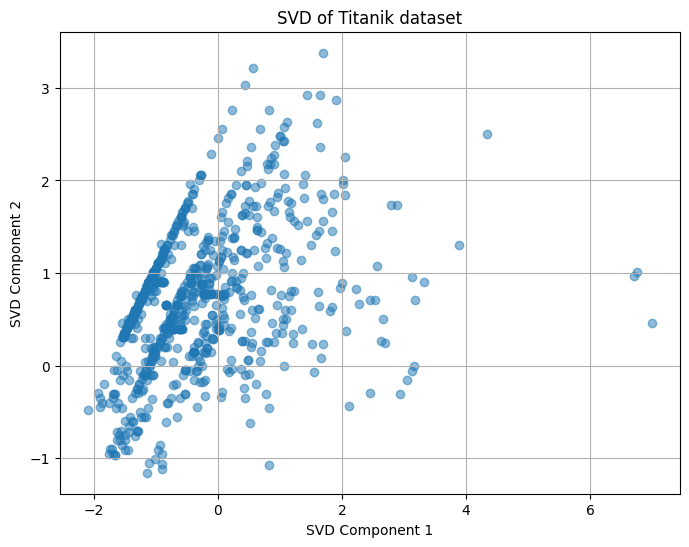

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(Y[:, 0], Y[:, 1], alpha=0.5)
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.title('SVD of Titanik dataset')
plt.grid(True)
